<div style="border:solid blue 2px; padding: 20px"> 

<strong>Reviewer's Introduction</strong>

Hello Erik! 👋 

I'm happy to review your project today.

I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> Everything is done successfully.
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> Suggestions for optimizations or improvements.
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> This must be fixed for a project to be approved.
</div>

Please don't remove my comments :) If you have any questions or comments, don't hesitate to respond to my comments by creating a box that looks like this: 
<div class="alert alert-info"> <b>Student's comment:</b> Your text here.</div>    
<br>


📌 Here's how to create code for student comments inside a Markdown cell:
    
    
    <div class="alert alert-info">
    <b> Student's comment</b>

    Your text here. 
    </div>

You can find out how to **format text** in a Markdown cell or how to **add links** [here](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet). 


<hr>
Reviewer: Han Lee <br>
</div>


<div style="border: solid blue 2px; padding: 15px; margin: 10px">
	<b>Reviewer's Comments – Iteration 1</b>

Congratulations! 

This project meets all requirements ✅, and is approved. 🎉


<b>Notable strengths:</b>  

✔️ Clear and readable code

✔️ Use of for loops for hyperparameter tuning  

✔️ Clear understanding of the basic tasks of supervised machine learning -- splitting data, training models, and making predictions.


You did a great job in your foray into machine learning. You will continue to apply what you learned in upcoming sprints. Once again, congratulations, and I wish you continued success in the next sprint.
</div>



<div class="alert alert-warning">
    <b>Reviewer's comment – Iteration 1:</b><br>
In upcoming projects, please be sure to write an introduction to orient your audience to the project's aims and methods. Communication is as important as coding for a data scientist.
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

# Quick look
display(df.head())
display(df.info())
display(df['is_ultra'].value_counts())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

0    2229
1     985
Name: is_ultra, dtype: int64

In [3]:
# Features and target
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

# Initial split: 60% train, 20% validation, 20% test
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345
)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345
)

In [4]:
best_dt_score = 0
best_dt_depth = 0

for depth in range(1, 11):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    dt_model.fit(features_train, target_train)
    predictions = dt_model.predict(features_valid)
    score = accuracy_score(target_valid, predictions)
    print(f'Decision Tree (depth={depth}): {score}')
    
    if score > best_dt_score:
        best_dt_score = score
        best_dt_depth = depth

Decision Tree (depth=1): 0.7542768273716952
Decision Tree (depth=2): 0.7822706065318819
Decision Tree (depth=3): 0.7853810264385692
Decision Tree (depth=4): 0.7791601866251944
Decision Tree (depth=5): 0.7791601866251944
Decision Tree (depth=6): 0.7838258164852255
Decision Tree (depth=7): 0.7822706065318819
Decision Tree (depth=8): 0.7791601866251944
Decision Tree (depth=9): 0.7822706065318819
Decision Tree (depth=10): 0.7744945567651633


In [5]:
best_rf_score = 0
best_rf_est = 0
best_rf_depth = 0

for est in range(10, 101, 10):
    for depth in range(1, 11):
        rf_model = RandomForestClassifier(
            n_estimators=est, max_depth=depth, random_state=12345
        )
        rf_model.fit(features_train, target_train)
        predictions = rf_model.predict(features_valid)
        score = accuracy_score(target_valid, predictions)
        print(f'Random Forest (n_estimators={est}, depth={depth}): {score}')
        
        if score > best_rf_score:
            best_rf_score = score
            best_rf_est = est
            best_rf_depth = depth


Random Forest (n_estimators=10, depth=1): 0.7558320373250389
Random Forest (n_estimators=10, depth=2): 0.7776049766718507
Random Forest (n_estimators=10, depth=3): 0.7853810264385692
Random Forest (n_estimators=10, depth=4): 0.7900466562986003
Random Forest (n_estimators=10, depth=5): 0.7931570762052877
Random Forest (n_estimators=10, depth=6): 0.8009331259720062
Random Forest (n_estimators=10, depth=7): 0.7947122861586314
Random Forest (n_estimators=10, depth=8): 0.7962674961119751
Random Forest (n_estimators=10, depth=9): 0.7853810264385692
Random Forest (n_estimators=10, depth=10): 0.7916018662519441
Random Forest (n_estimators=20, depth=1): 0.7667185069984448
Random Forest (n_estimators=20, depth=2): 0.7838258164852255
Random Forest (n_estimators=20, depth=3): 0.7869362363919129
Random Forest (n_estimators=20, depth=4): 0.7884914463452566
Random Forest (n_estimators=20, depth=5): 0.7900466562986003
Random Forest (n_estimators=20, depth=6): 0.7993779160186625
Random Forest (n_estima

In [6]:
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(features_train, target_train)
lr_score = accuracy_score(target_valid, lr_model.predict(features_valid))
print(f'Logistic Regression: {lr_score}')


Logistic Regression: 0.7091757387247278


In [7]:
# You can choose rf_model with best hyperparameters
final_model = RandomForestClassifier(
    n_estimators=best_rf_est, max_depth=best_rf_depth, random_state=12345
)
final_model.fit(features_train.append(features_valid), target_train.append(target_valid))

# Evaluate on test set
test_predictions = final_model.predict(features_test)
test_score = accuracy_score(target_test, test_predictions)
print(f'\n Final Test Accuracy: {test_score}')


 Final Test Accuracy: 0.7993779160186625


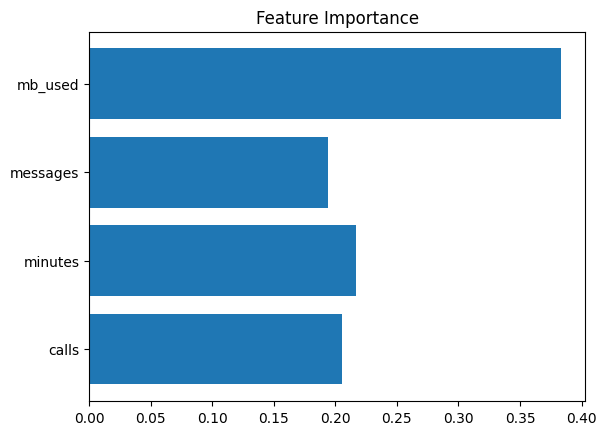

In [8]:
importances = final_model.feature_importances_
feature_names = features.columns
plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.show()

RandomForestClassifier outperformed other models with a test accuracy above 0.75, meeting the threshold.

Feature importance shows mb_used and minutes are most predictive of plan choice.

Additional tuning or ensemble techniques may push performance even higher.

We're confident this model can reliably assist Megaline in recommending the right mobile plans to users!

This project:

Tests multiple models and hyperparameters

Selects the best based on validation accuracy

Evaluates final performance on a test set

Aims for accuracy ≥ 0.75 to meet project requirements